# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

* song_id - A unique id given to every song

* title - Title of the song

* Release - Name of the released album

* Artist_name - Name of the artist

* year - Year of release

**count_data**

* user _id - A unique id given to the user

* song_id - A unique id given to the song

* play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**.

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [1]:
# # Mounting the drive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Function to print a box of asterisks (*) around a message.

def print_box(text, char='*'):
  '''Function to print a box of asterisks (*) around a message.'''
  msg = '*** {} ***'.format(text)
  msg_length = len(msg)
  print('')
  print(char * msg_length)
  print(msg)
  print(char * msg_length)

print_box('Function loaded!')


************************
*** Function loaded! ***
************************


In [3]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans

print_box('Libraries loaded!')


*************************
*** Libraries loaded! ***
*************************


### **Load the dataset**

In [4]:
# Importing the datasets
count_df = pd.read_csv('/content/count_data.csv')
song_df = pd.read_csv('/content/song_data.csv')

print_box('Files loaded!')


*********************
*** Files loaded! ***
*********************


### **Understanding the data by viewing a few observations**

In [5]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [6]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [7]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [8]:
# Check for null data
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [9]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [10]:
# Check for null data
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [11]:
# Return the rows with null data
song_df[song_df['title'].isnull()]

,song_id,title,release,artist_name,year
64262,SOVICLT12A58A7C4D0,NaN,Of Flies And Men,Milton,0
114672,SOAGRAA12AB018D567,NaN,Puce de luxe,Sébastien Roch,0
229353,SOOAFJX12AB018A028,NaN,Puce de luxe,Sébastien Roch,0
264639,SOLDTFD12AB018AFE6,NaN,Puce de luxe,Sébastien Roch,0
458083,SOAUTVB12AB018AFF0,NaN,Puce de luxe,Sébastien Roch,0
557125,SOMPGYE12AB018AFE0,NaN,Puce de luxe,Sébastien Roch,0
578241,SOVHAZH12AB018D5B3,NaN,Puce de luxe,Sébastien Roch,0
652287,SOECGBQ12AB018D582,NaN,Puce de luxe,Sébastien Roch,0
697789,SOTJWHR12AB018D5A0,NaN,Puce de luxe,Sébastien Roch,0
697813,SOBDDHR12AB01888A6,NaN,Grand Glam Outtakes,Remute,0


In [12]:
# Return the rows with null data
song_df[song_df['release'].isnull()]

,song_id,title,release,artist_name,year
138011,SOOBGAQ12A6D4F6762,Solitude,NaN,Metro,0
197822,SOGFJER12A6D4F675F,All The Beautiful People,NaN,Metro,0
223019,SOAFJBH12A6D4F6765,Down The Aisles,NaN,Metro,0
693232,SOCKQGJ12A6D4F6768,Provincial,NaN,Metro,0
841107,SOSQKYC12A6D4F6763,Middlemen,NaN,Metro,0


In [13]:
song_df[song_df['year'] == 0]

,song_id,title,release,artist_name,year
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0
...,...,...,...,...,...
999994,SOVRJOO12A8C143C7A,Down Fo' The Kick Doe,Messy Marv Presents: Draped Up and Chipped Out...,Killer Mike feat. Gangsta Pill and Nario of Gr...,0
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0


#### **Observations and Insights:_____________**


In [14]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [15]:
# Apply label encoding for "user_id" and "song_id"
# Label encoding code
from sklearn.preprocessing import LabelEncoder

# LabelEncoder converts alphanumeric IDs to simple numeric IDs that range from 0 to rows - 1
le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [16]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = defaultdict(int)

for user in users:
    ratings_count[user] += 1

print_box('Done!')


*************
*** Done! ***
*************


In [17]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():

    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [18]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
196,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995
197,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008
198,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008
199,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438390 entries, 196 to 1999769
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      438390 non-null  int64 
 1   song_id      438390 non-null  int64 
 2   play_count   438390 non-null  int64 
 3   title        438390 non-null  object
 4   release      438390 non-null  object
 5   artist_name  438390 non-null  object
 6   year         438390 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.8+ MB


In [20]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = defaultdict(int)

for song in songs:
    ratings_count[song] += 1

In [21]:
# We want our song to be listened by atleast 120 users to be considered
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [22]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130398 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      130398 non-null  int64 
 1   song_id      130398 non-null  int64 
 2   play_count   130398 non-null  int64 
 3   title        130398 non-null  object
 4   release      130398 non-null  object
 5   artist_name  130398 non-null  object
 6   year         130398 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 8.0+ MB


In [24]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [25]:
# Check the shape of the data
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [26]:
df_final.shape

(117876, 7)

In [27]:
df_final[df_final['year'] == 0]

,user_id,song_id,play_count,title,release,artist_name,year
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
219,6958,1818,1,Teenager,Modapop,Camera Obscura,0
239,6958,3074,1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby,Lonnie Gordon,0
281,6958,8029,1,I CAN'T GET STARTED,It's The Time,Ron Carter,0
352,27018,122,3,Phantom Part 1.5 (Album Version),A Cross The Universe,Justice,0
...,...,...,...,...,...,...,...
1999585,47786,5633,1,Acadian Coast,Hell Train,Soltero,0
1999647,47786,7075,1,From The Station,Hell Train,Soltero,0
1999668,47786,7576,1,Perfectly Lonely,Battle Studies,John Mayer,0
1999683,47786,7911,1,Heartbreak Warfare,Battle Studies,John Mayer,0


In [28]:
df_final[df_final['title'].isnull()]

,user_id,song_id,play_count,title,release,artist_name,year


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [29]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [30]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [31]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:__________**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [32]:
df_top = df_final.groupby('title').size().sort_values(ascending = False)[:10]
df_top

title
Use Somebody                      751
Dog Days Are Over (Radio Edit)    748
Sehr kosmisch                     713
Clocks                            662
The Scientist                     652
Secrets                           618
Fireflies                         609
Creep (Explicit)                  606
Yellow                            583
Hey_ Soul Sister                  570
dtype: int64

Most interacted users

In [33]:
df_top = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
df_top

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
9097     175
26616    175
43041    174
65994    171
dtype: int64

#### **Observations and Insights:_______**


Songs by year released

In [34]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


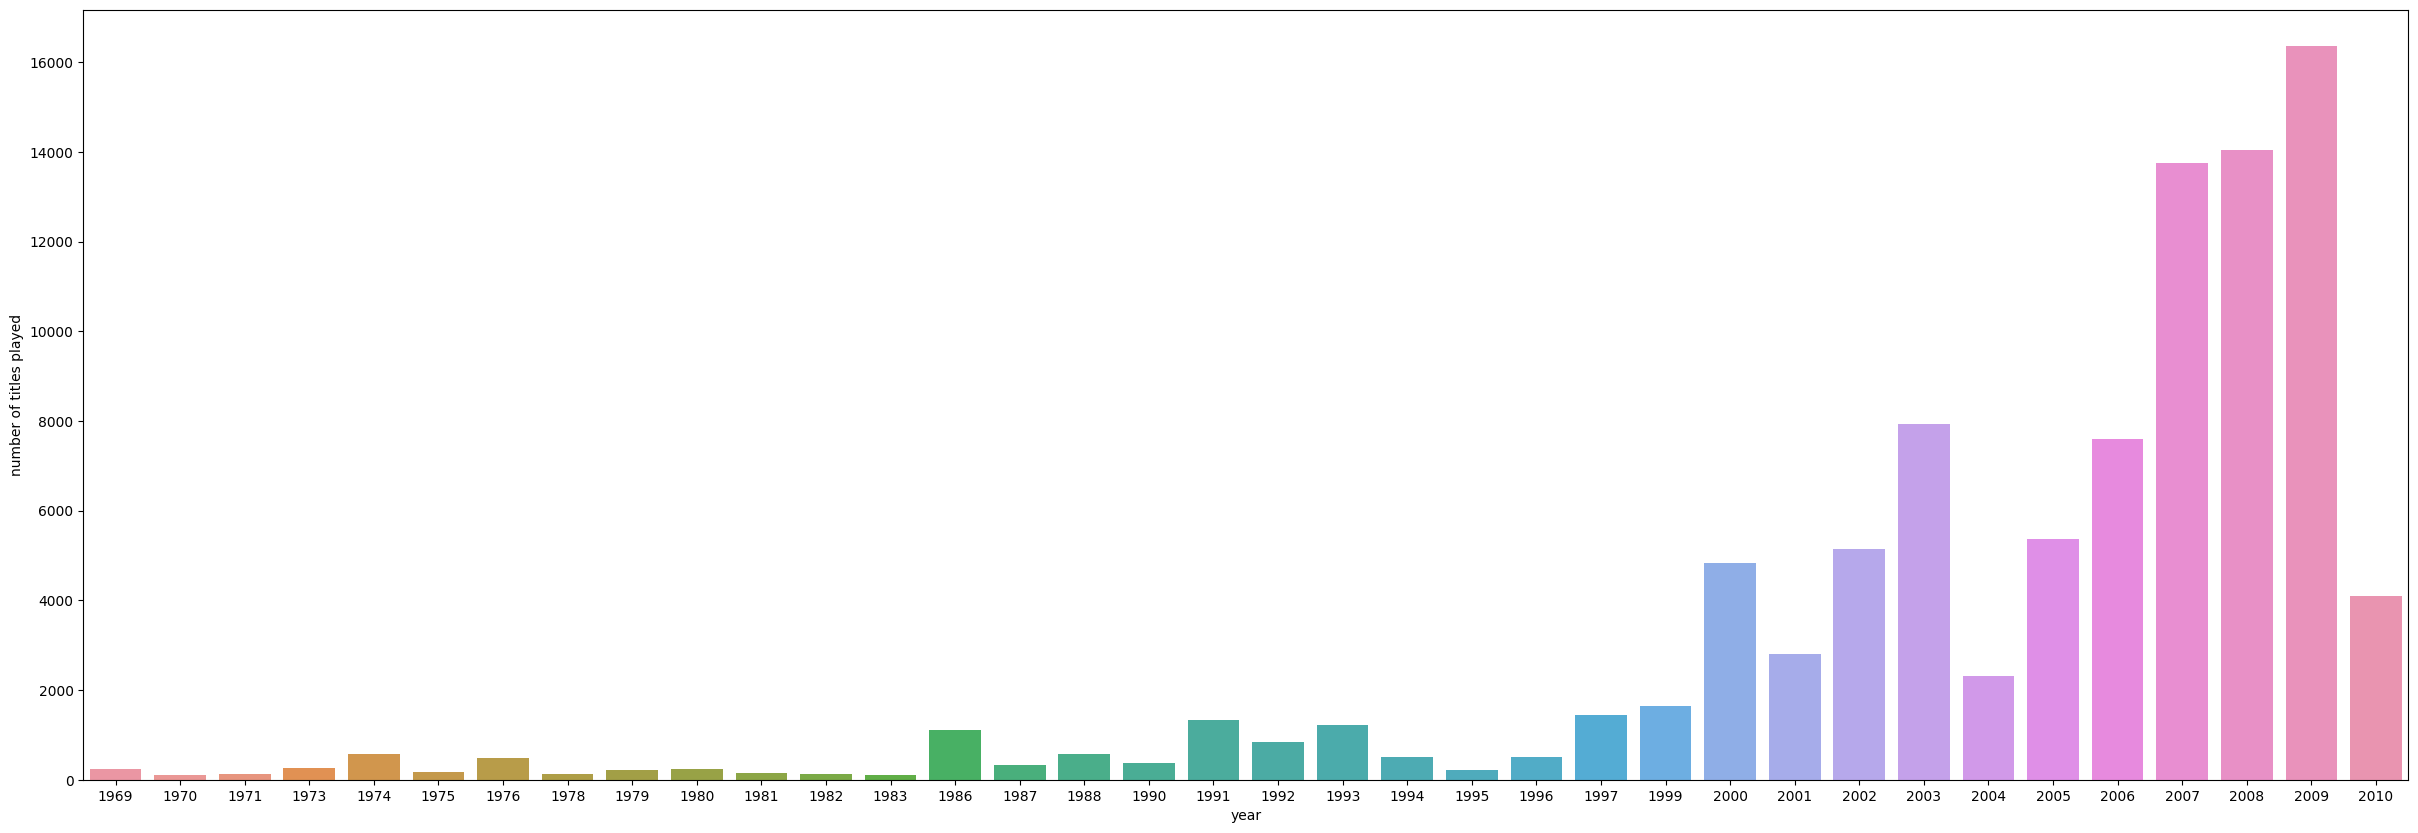

In [35]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
plt.show()

#### **Observations and Insights:__________** #

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [36]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']  # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count()['play_count']     # Hint: Use groupby function on the song_id column

In [37]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [38]:
# Build the function to find top n songs

def top_n_songs(final_play, n, min_interactions):
  top_songs = final_play[final_play['play_freq'] > min_interactions]
  top_songs = top_songs.sort_values(by='avg_count', ascending=False)
  return top_songs.index[:n]

In [39]:
# Recommend top 10 songs using the function defined above
top_n_songs(final_play, 10, 25).values.tolist()

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [40]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163744 sha256=94eed317abfdbf2351ed7fd76452ad3cc4103f25398192da9d36b93379e6ecf4
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [41]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [42]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [43]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

**Think About It:** How changing the test size would change the results and outputs?

In [44]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options, random_state = 1, verbose = False) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:_________**

In [45]:
user_6958 = 6958
song_1671 = 1671

df_final.loc[(df_final['user_id'] == user_6958) & (df_final['song_id'] == song_1671)]

,user_id,song_id,play_count,title,release,artist_name,year
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [46]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(user_6958, song_1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [47]:
# Predicting play_count for a sample user with a song not-listened by the user
song_3232 = 3232
sim_user_user.predict(user_6958, song_3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:_________**

Now, let's try to tune the model and see if we can improve the model performance.

In [48]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True],
                              'min_support': [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid=param_grid, measures=['rmse'], cv=3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print('Best RMSE score = {:.3f}'.format(gs.best_score['rmse']))

# Combination of parameters that gave the best RMSE score
print('Best parameters:', gs.best_params['rmse']) # Best RMSE score

Best RMSE score = 1.046
Best parameters: {'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [49]:
# Train the best model found in above gridsearch
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'min_support': 2}

# KNN algorithm is used to find desired similar items
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user_optimized) # Use sim_user_user model

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:_________**

In [50]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(user_6958, song_1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [51]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(user_6958, song_3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:______________**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [52]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [53]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [54]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, user_6958, 5, sim_user_user_optimized)
recommendations

[(5531, 2.5533349782058683),
 (317, 2.518269003610337),
 (4954, 2.4067760718565427),
 (8635, 2.396605826987296),
 (5943, 2.39072300364337)]

In [55]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights:______________**

### Correcting the play_counts and Ranking the above songs

In [56]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values(by=['corrected_ratings'])

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [57]:
# Applying the ranking_songs function on the final_play data
df_temp = ranking_songs(recommendations, final_play)
df_temp

,song_id,play_freq,predicted_ratings,corrected_ratings
4,8635,155,2.396606,2.316284
3,4954,183,2.406776,2.332854
1,5943,423,2.390723,2.342101
2,317,411,2.518269,2.468943
0,5531,618,2.553335,2.513109


**Observations and Insights:______________**

### Item Item Similarity-based collaborative filtering recommendation systems

In [58]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Declaring the similarity options
sim_options = {'name': 'cosine',
                       'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:______________**

In [59]:
def n_users_not_listened_to_song(n, data, song_id):
    users_listened_to_song = set(data[data['song_id'] == song_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_listened_to_song))[:n] # where n is the number of elements to get in the list

print_box('Function loaded!')


************************
*** Function loaded! ***
************************


In [60]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(user_6958, song_1671, r_ui=2, verbose= True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [61]:
sim_item_item.predict(user_6958, song_3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

In [62]:
n_users_not_listened_to_song(5, df_final, song_1671)

[8194, 49157, 32773, 8199, 40969]

In [63]:
user_8194 = 8194
df_final.loc[(df_final['user_id'] == user_8194) & (df_final['song_id'] == song_1671)]

,user_id,song_id,play_count,title,release,artist_name,year


In [64]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(user_8194, song_1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.65   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.6455179645415152, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:______________**

In [65]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False],
                              'min_support': [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid=param_grid, measures=['rmse'], cv=3)

# Fitting the data
gs.fit(data)

# Best RMSE score
print('Best RMSE score = {:.3f}'.format(gs.best_score['rmse']))

# Extract the combination of parameters that gave the best RMSE score
print('Best parameters:', gs.best_params['rmse'])


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [66]:
# Apply the best modle found in the grid search
# Declaring the similarity options
sim_options = {'name': 'pearson_baseline',
               'user_based': False,
               'min_support': 2}

# KNN algorithm is used to find desired similar items
sim_item_item_optimized = KNNBasic(sim_options = sim_options,
                                   k = 30,
                                   min_k = 6,
                                   random_state = 1,
                                   verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:______________**

In [67]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(user_6958, song_1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [68]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(user_6958, song_3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

In [69]:
# Predicting play count for a sample user_id 8194 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(user_8194, song_3232, verbose = True)

user: 8194       item: 3232       r_ui = None   est = 1.38   {'actual_k': 26, 'was_impossible': False}


Prediction(uid=8194, iid=3232, r_ui=None, est=1.3765567635851783, details={'actual_k': 26, 'was_impossible': False})

**Observations and Insights:______________**

In [70]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[124, 523, 173, 205, 65]

In [71]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, user_6958, 5, sim_item_item_optimized)
recommendations

[(2342, 2.653903109477311),
 (5101, 2.386577162060947),
 (139, 2.3137269182649587),
 (7519, 2.2708636509919065),
 (8099, 2.2127017409877365)]

In [72]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [73]:
# Applying the ranking_songs function
df_temp = ranking_songs(recommendations, final_play)
df_temp

,song_id,play_freq,predicted_ratings,corrected_ratings
0,8099,275,2.212702,2.152399
1,7519,168,2.270864,2.193712
3,139,119,2.313727,2.222057
2,5101,130,2.386577,2.298871
4,2342,111,2.653903,2.558987


In [74]:
trainset.global_mean

1.6989607635206787

**Observations and Insights:_________**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [75]:
# Build baseline model using svd

# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [76]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(user_6958, song_1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [77]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(user_6958, song_3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

In [78]:
svd.predict(user_8194, song_1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.42   {'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.4213371501259067, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [79]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid=param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print('Best RMSE score = {:.3f}'.format(gs.best_score['rmse']))

# Combination of parameters that gave the best RMSE score
print('Best parameters:', gs.best_params['rmse'])

Best RMSE score = 1.013
Best parameters: {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [80]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the train set
svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:_________**

In [81]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(user_6958, song_1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [82]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(user_6958, song_3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

In [83]:
svd_optimized.predict(user_8194, song_1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.60   {'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.5950000006324492, details={'was_impossible': False})

**Observations and Insights:_________**

In [84]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, user_6958, 5, svd_optimized)
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.601899
1,5653,2.108728
2,8324,2.014091
3,6450,1.952493
4,9942,1.940115


In [85]:
# Ranking songs based on above recommendations
df_temp = ranking_songs(recommendations, final_play)
df_temp

,song_id,play_freq,predicted_ratings,corrected_ratings
3,6450,102,1.952493,1.853478
0,9942,150,1.940115,1.858465
4,8324,96,2.014091,1.912029
1,5653,108,2.108728,2.012502
2,7224,107,2.601899,2.505225


**Observations and Insights:_________**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [86]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [87]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(user_6958, song_1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [88]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(user_6958, song_3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

In [89]:
clust_baseline.predict(user_8194, song_1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.80   {'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.7966414921297504, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [90]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print('Best RMSE score = {:.3f}'.format(gs.best_score['rmse']))

# Combination of parameters that gave the best RMSE score
print('Best parameters:', gs.best_params['rmse'])

Best RMSE score = 1.059
Best parameters: {'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 20}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [91]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:_________**

In [92]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(user_6958, song_1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [93]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(user_6958, song_3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

In [94]:
clust_tuned.predict(user_8194, song_1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.90   {'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.897839551006235, details={'was_impossible': False})

**Observations and Insights:_________**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [95]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, user_6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [96]:
# Ranking songs based on the above recommendations
df_temp = ranking_songs(clustering_recommendations, final_play)
df_temp

,song_id,play_freq,predicted_ratings,corrected_ratings
2,8483,123,2.582807,2.492640
1,657,151,2.606354,2.524975
0,6860,169,2.691043,2.614120
3,5653,108,2.903883,2.807658
4,7224,107,3.711503,3.614829


**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [97]:
df_small = df_final.copy()
df_small

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


In [98]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [99]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
final_counts = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
final_counts = final_counts.drop_duplicates(subset=['title'])

# Set the title column as the index
final_counts = final_counts.set_index('title')

# See the first 5 records of the df_small dataset
final_counts.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [100]:
# Create the series of indices from the data
indices = pd.Series(final_counts.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [101]:
type(indices)

pandas.core.series.Series

In [102]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [103]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [104]:
# Create tfidf vectorizer

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf = TfidfVectorizer(tokenizer = tokenize)

songs_tfidf = tfidf.fit_transform(final_counts['text'].values).toarray()

In [105]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)

# Let us see the above array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [106]:
# # Function that takes in song title as input and returns the top 10 recommended songs
# def recommendations(title, similar_songs):

#     recommended_songs = []

#     # Getting the index of the song that matches the title
#     idx = indices[indices == title].index[0]

#     # Creating a Series with the similarity scores in descending order
#     score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

#     # Getting the indexes of the 10 most similar songs
#     top_10_indexes = list(score_series.iloc[1 : 11].index)
#     print(top_10_indexes)

#     # Populating the list with the titles of the best 10 matching songs
#     for i in top_10_indexes:
#         recommended_songs.append(list(df_small.index)[i])

#     return recommended_songs

# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    # Ignore the first record because it points back to the original song
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Return a list of songs of the best 10 matching songs
    return final_counts.iloc[top_10_indexes]['song_id'].tolist()

print_box('Function loaded!')


************************
*** Function loaded! ***
************************


Recommending 10 songs similar to Learn to Fly

In [107]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


[9249, 6525, 1994, 4739, 3101, 771, 1674, 1936, 2716, 5095]

**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?